In [1]:
# importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# loading dataset

zoo_data = pd.read_csv('Zoo.csv')
zoo_data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# data understanding

zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# data preprocessing

#checking for duplicates
duplicate = zoo_data.animal_name.value_counts()
duplicate[duplicate > 1]

frog    2
Name: animal_name, dtype: int64

In [5]:
#select the duplicate 'frog'
frog = zoo_data.loc[zoo_data['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [6]:
# venomous data is diff, hence rename it
zoo_data['animal_name'][(zoo_data.venomous==1)&(zoo_data.animal_name=='frog')] ='frog2'

In [7]:
zoo_data.head(30)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


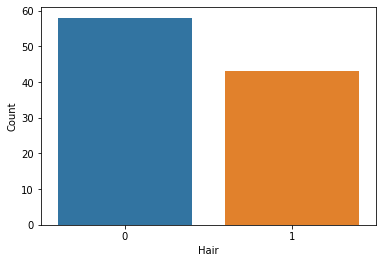

0    58
1    43
Name: hair, dtype: int64

In [8]:
# category based on hair

sns.countplot(x="hair", data=zoo_data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo_data.loc[:,'hair'].value_counts()

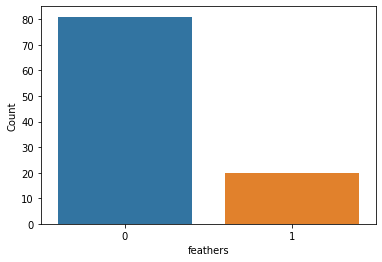

0    81
1    20
Name: feathers, dtype: int64

In [31]:
# category based on feathers

sns.countplot(x="feathers", data=zoo_data)
plt.xlabel("feathers")
plt.ylabel("Count")
plt.show()
zoo_data.loc[:,'feathers'].value_counts()

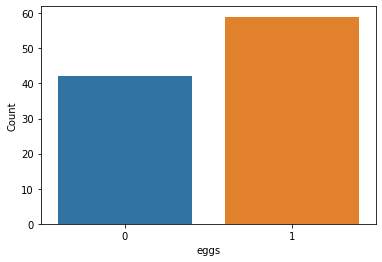

1    59
0    42
Name: eggs, dtype: int64

In [32]:
# category based on eggs

sns.countplot(x="eggs", data=zoo_data)
plt.xlabel("eggs")
plt.ylabel("Count")
plt.show()
zoo_data.loc[:,'eggs'].value_counts()

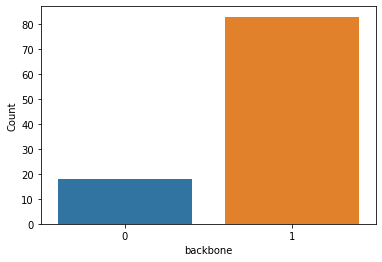

1    83
0    18
Name: backbone, dtype: int64

In [33]:
# category based on backbone

sns.countplot(x="backbone", data=zoo_data)
plt.xlabel("backbone")
plt.ylabel("Count")
plt.show()
zoo_data.loc[:,'backbone'].value_counts()

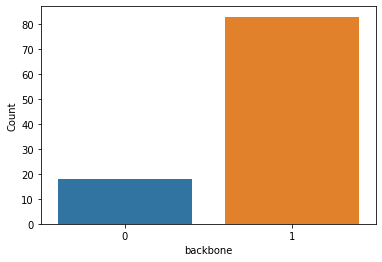

1    83
0    18
Name: backbone, dtype: int64

In [34]:
# category based on backbone

sns.countplot(x="backbone", data=zoo_data)
plt.xlabel("backbone")
plt.ylabel("Count")
plt.show()
zoo_data.loc[:,'backbone'].value_counts()

In [35]:
zoo_data = zoo_data.sort_values(by='type',ascending=False)

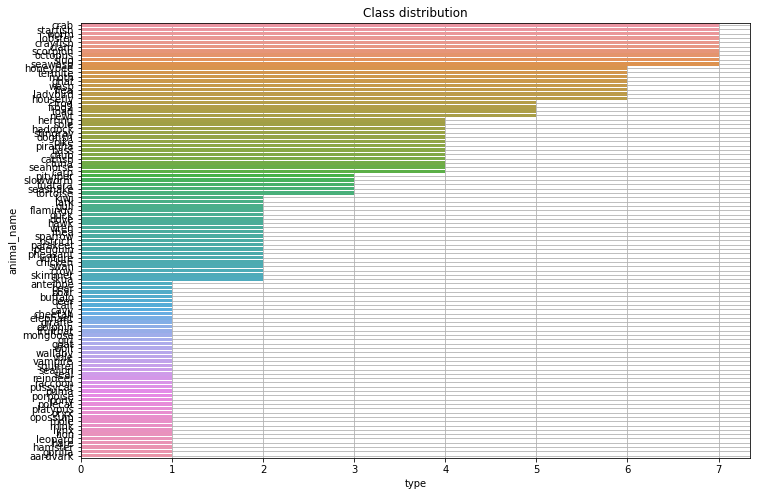

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=zoo_data, x='type',y='animal_name',zorder=2)
plt.title('Class distribution')
ax.grid(zorder=0)
plt.show()

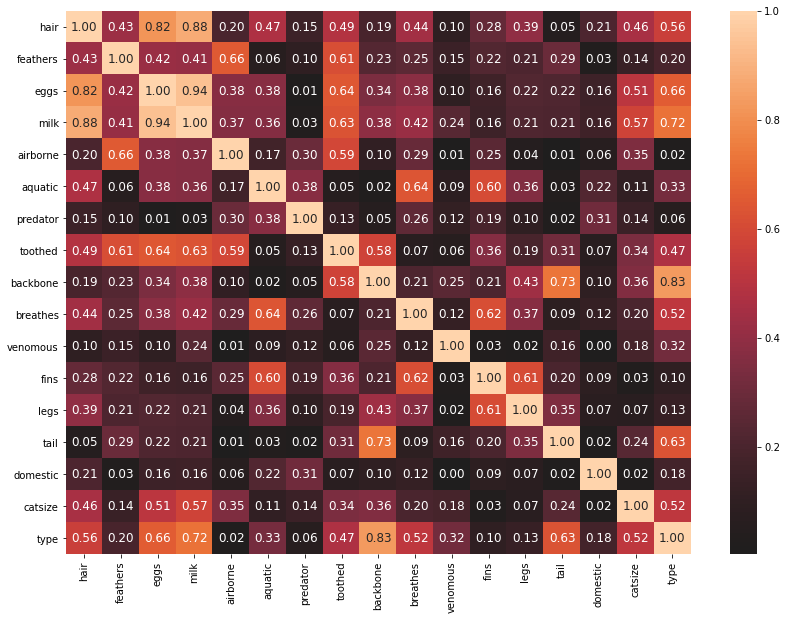

In [37]:
plt.figure(figsize=(14,10))
sns.heatmap(abs(zoo_data.corr()),annot=True,annot_kws={'size':12},fmt='.2f',center=0)
plt.show()

In [38]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo_data.iloc[:,1:17]
y = zoo_data.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 16), (31, 16), (70,), (31,))

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
KNN = KNeighborsClassifier(n_neighbors=3)

# Train the model
KNN.fit(X_train, y_train)
y_pred_KNeighborsClassifier = KNN.predict(X_test)

scrs = []

#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scrs.append(score)

In [41]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

from sklearn.model_selection import cross_val_score


cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(KNN, X,y, cv=10)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.95 (+/- 0.13) with k value equals to 3


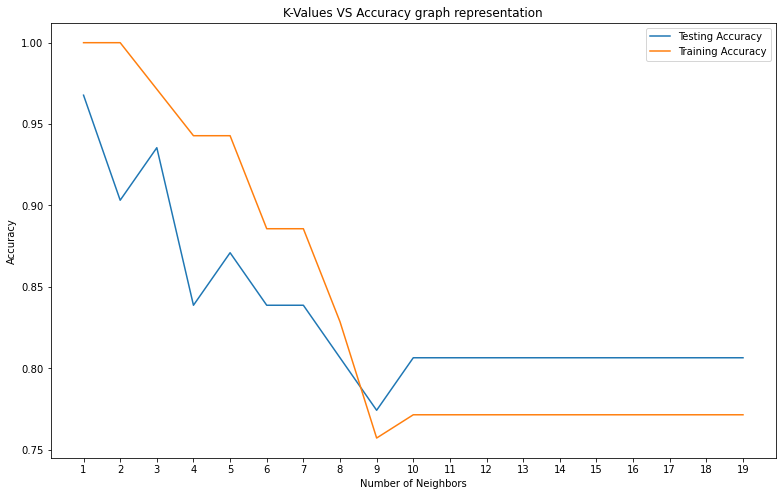

Best accuracy is 0.967741935483871 with K = 1


In [42]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))